# Como criar um Programa de Fidelidade para empresa?

# 0.0 Planejamento da solução (IOT)

### Input - Entrada

**1. Problema de Negócio**
  - Selecionar os clientes mais valiosos para integrar um programa de fidelização
  
**2. Conjunto de dados**
  - Vendas de um Ecommerce Online, durante o período de um ano.

### Output - Saída

**1. Indicação das pessoas que farão parte do programa Insiders**

  - Lista: client_id | is_insider

**2. Relatório com as respostas das perguntas de negócio.**

  - Quem são as pessoas elegíveis para participar do programa de Insiders?
  - Quantos clientes farão parte do grupo?
  - Quais as principais características desse clientes?
  - Qual a porcentagem de contribuição do faturamento desses clientes, vinda do Insiders?
  - Qual a expectativa de faturamento desse grupo para os próximos meses?
  - Quais as condições para uma pessoa ser elegível ao Insiders?
  - Quais as condições para uma pessoa ser removida do Insiders?
  - Qual a garantia que o programa Insiders é melhor que o restante da base?
  - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

**1. Quem são as pessoas elegíveis para participar do programa de Insiders?**

  - O que é ser elegível? O que são clientes de maior "valor"?
  - Faturamento:
    - Alto Ticket Médio
    - Alto LTV (Life Time Value - Gasto durante seu período de vida na empresa)
    - Baixo Recência
    - Alto basket size (tamanho da cesta de compra)
    - Baixa probabilidade de churn (parou de comprar)
    - Alta previsão LTV
    - Alta previsão de compra

  - Custo
    - Baixa taxa de devolução

  - Experiência de Compra
    - Média alta das avaliações

**2. Quantos clientes farão parte do grupo?**

  - Número total de clientes
  - Calcula a % do grupo Insiders

**3. Quais as principais características desse clientes?**

  - Escrever características do cliente
    - Idade
    - Localização
    
  - Ecrever características de consumo
    - Atributos da clusterização (perfil de compra do cliente)

**4. Qual a porcentagem de contribuição do faturamento desses clientes, vinda do Insiders?**

  - Faturamento total do ano
  - Faturamento do grupo Insiders

**5. Qual a expectativa de faturamento desse grupo para os próximos meses?**

  - LTV do grupo Insiders
  - Análise de Cohort (Marcação da pessoa, como por exemplo no tempo, perfil de pessoas que entraram no mesmo mês)

**6. Quais as condições para uma pessoa ser elegível ao Insiders?**

  - Definir a periodicidade (recorrência de rodar o modelo)
  - A pessoa precisa ser similar ou parecida com uma pessoa do grupo

**7. Quais as condições para uma pessoa ser removida do Insiders?**

  - Definir a periodicidade (recorrência de rodar o modelo)
  - A pessoa precisa ser disimilar ou se distanciar das médias do grupo

**8. Qual a garantia que o programa Insiders é melhor que o restante da base?**

  - Teste A/B
  - Teste A/B Baysiano
  - Teste de hipóteses
  
**9. Quais ações o time de marketing pode realizar para aumentar o faturamento?**

  - Desconto
  - Preferência de compra
  - Frete
  - Visita a empresa

## Benchmark de soluções

### 1. Desk Research - Pesquisa de soluções das outras empresas

**Modelo RFM**

**1. Recência**

  * Tempo desde a última compra

  * Responsividade

**2. Frequência**

  * Quantidade de compras em um período

  * Engajamento

**3. Monetária**

  * Total gasto, faturamento

  * Alto valor de compra

**1. Passo 01:**

* Ordernar os clientes por **Recência**

**2. Passo 02:**

* Dividir a base de clientes de acordo com as notas
  - Notas de 1 - 5 (5 notas possíveis)
  - Divide a base de clientes em 5 grupos de 20% cada
  - Quanto menor o valor, maior nota

* Essa nota se chama R Score

**3. Passo 03:**

* Ordernar os clientes pela **Frequência**

**4. Passo 04:**

* Dar as notas de maneira similar ao passo 02
* Essa nota se chama F Score
* Quanto maior o valor, maior a nota

**5. Passo 05:**

* Ordenar pelo **monetário** (faturamento)

**6. Passo 06:**

* Dar as notas de maneira similar ao passo 02 e 04
* Essa nota de chama M Score
* Quanto maior o valor, maior a nota

**7. Passo 07:**

* Calcular a média das notas R,F,M
* RFM Score (pode ordenar por essa média para ter os melhores clientes)

**Definições que podem ser usadas para dividir os clientes com o RFM e assim direcionar esse clientes para as melhores ações**

**1. Champions**

  - Compra recentes, frequentes com alto valor gasto
  - Prêmios para esses clientes

**2. Potential Loyalists**

  - Compras recentes, boa frequência e bom valor gasto
  - Programa de Fidelização e Upsell

**3. New Custumers**

  - Compra recente, baixa frequência
  - Construção de Relacionamento, ofertas especiais

**4. At Risk Custumers**

  - "Faz tempo que não compra"
  - Campanhas de reativação, ofertas, produtos

**5. Can't Lose Them**

  - Faz tempo que não compra e não viita o site


# 0.1 Imports

In [1]:
import warnings

import pandas  as pd
import numpy   as np
import seaborn as sns

from yellowbrick.cluster   import KElbowVisualizer
from IPython.display       import Image
from IPython.core.display  import HTML

from matplotlib            import pyplot  as plt
from sklearn               import cluster as c
from sklearn               import metrics as m
from plotly                import express as px

warnings.filterwarnings( 'ignore' )

# 0.2 Helper Functions

In [2]:
def jupyter_settings():
    """Definições padrões setadas para o uso o Jupyter Notebook."""
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

#Executando a função
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


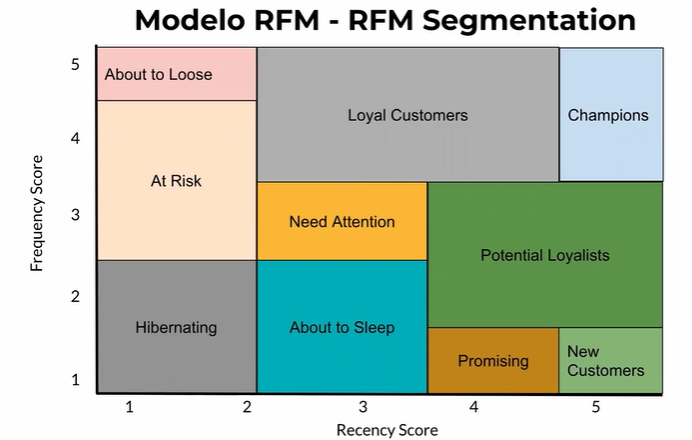

In [3]:
Image(filename=r'C:\Users\bruno.freitas\Documents\repositorio\insiders_loyalty_program\img\modelo_rfm.png')

Com isso, você consegue entender:

1. Quem são seus melhores clientes?

2. Quais clientes estão próximos do Churn?

3. Quais os potenciais clientes para entrar no programa de Fidelização?

4. Quais clientes precisam ser retidos?

5. Quais clientes mais prováveis de responder as campanhas de marketing?

# 0.3 Load Dataset

In [4]:
#load dat
df_raw = pd.read_csv(r'C:\Users\bruno.freitas\Documents\repositorio\insiders_loyalty_program\data\Ecommerce\Ecommerce.csv',encoding='unicode_escape')

#drop extra column
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

# 1.0. Descrição dos dados

In [5]:
df_raw.shape

(541909, 8)

In [6]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [8]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df1.columns = cols_new

In [9]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2 Data Dimensions

In [10]:
print(f'Number of rows {df1.shape[0]}')
print(f'Number of cols {df1.shape[1]}')

Number of rows 541909
Number of cols 8


## 1.3 Data Types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [13]:
round(1-(406829/541909), 2)

np.float64(0.25)

In [14]:
#removendo os na
df1 = df1.dropna(subset=['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0] / df_raw.shape[0]))) #Quanto % de NA removeu do total

Removed data: 0.25


In [15]:
# Restante
df1.shape

(406829, 8)

In [16]:
#Checando se os NA foram realmente removidos
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6 Change dtypes

In [17]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [18]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [19]:
# Mostrando a mudança dos tipos
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7 Descriptive Statistics

### Será feito futuramente

# 2.0. Feature Engineering

In [20]:
df2 = df1.copy()

## 2.1 Feature Creation

In [21]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [22]:
# Tabela de Referência
df_ref = df2.drop(['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],axis=1).drop_duplicates(ignore_index=True)

In [23]:
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [24]:
#Gross Revenue (Faturamento Bruto): qtde * preço
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

In [25]:
#Monetary
df_monetary = df2.loc[:,['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id',how='left')


In [26]:
#Recency
df_recency = df2.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days #vetoriza a série para aplicar o day
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')


In [27]:
#frequency
df_freq = df2.loc[:,['customer_id','invoice_no']].groupby('customer_id').nunique().reset_index()
df_ref = pd.merge(df_ref, df_freq,on='customer_id',how='left')

In [28]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [29]:
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

# 3.0. Filtragem de Variáveis

In [30]:
df3 = df_ref.copy()

# 4.0. EDA (Exploratory Data Analysis)

In [31]:
df4 = df3.copy()

# 5.0. Data Preparation

In [32]:
df5 = df4.copy()

# 6.0. Feature Selection

In [33]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine - Tunning

In [34]:
x = df6.drop(columns=['customer_id'],axis=1)

In [35]:
x.head()

,gross_revenue,recency_days,invoice_no
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


In [36]:
df7 = df6.drop(columns=['customer_id'])
clusters = [2,3,4,5,6]

## 7.1 Within-Cluster Sum of Square (WSS)

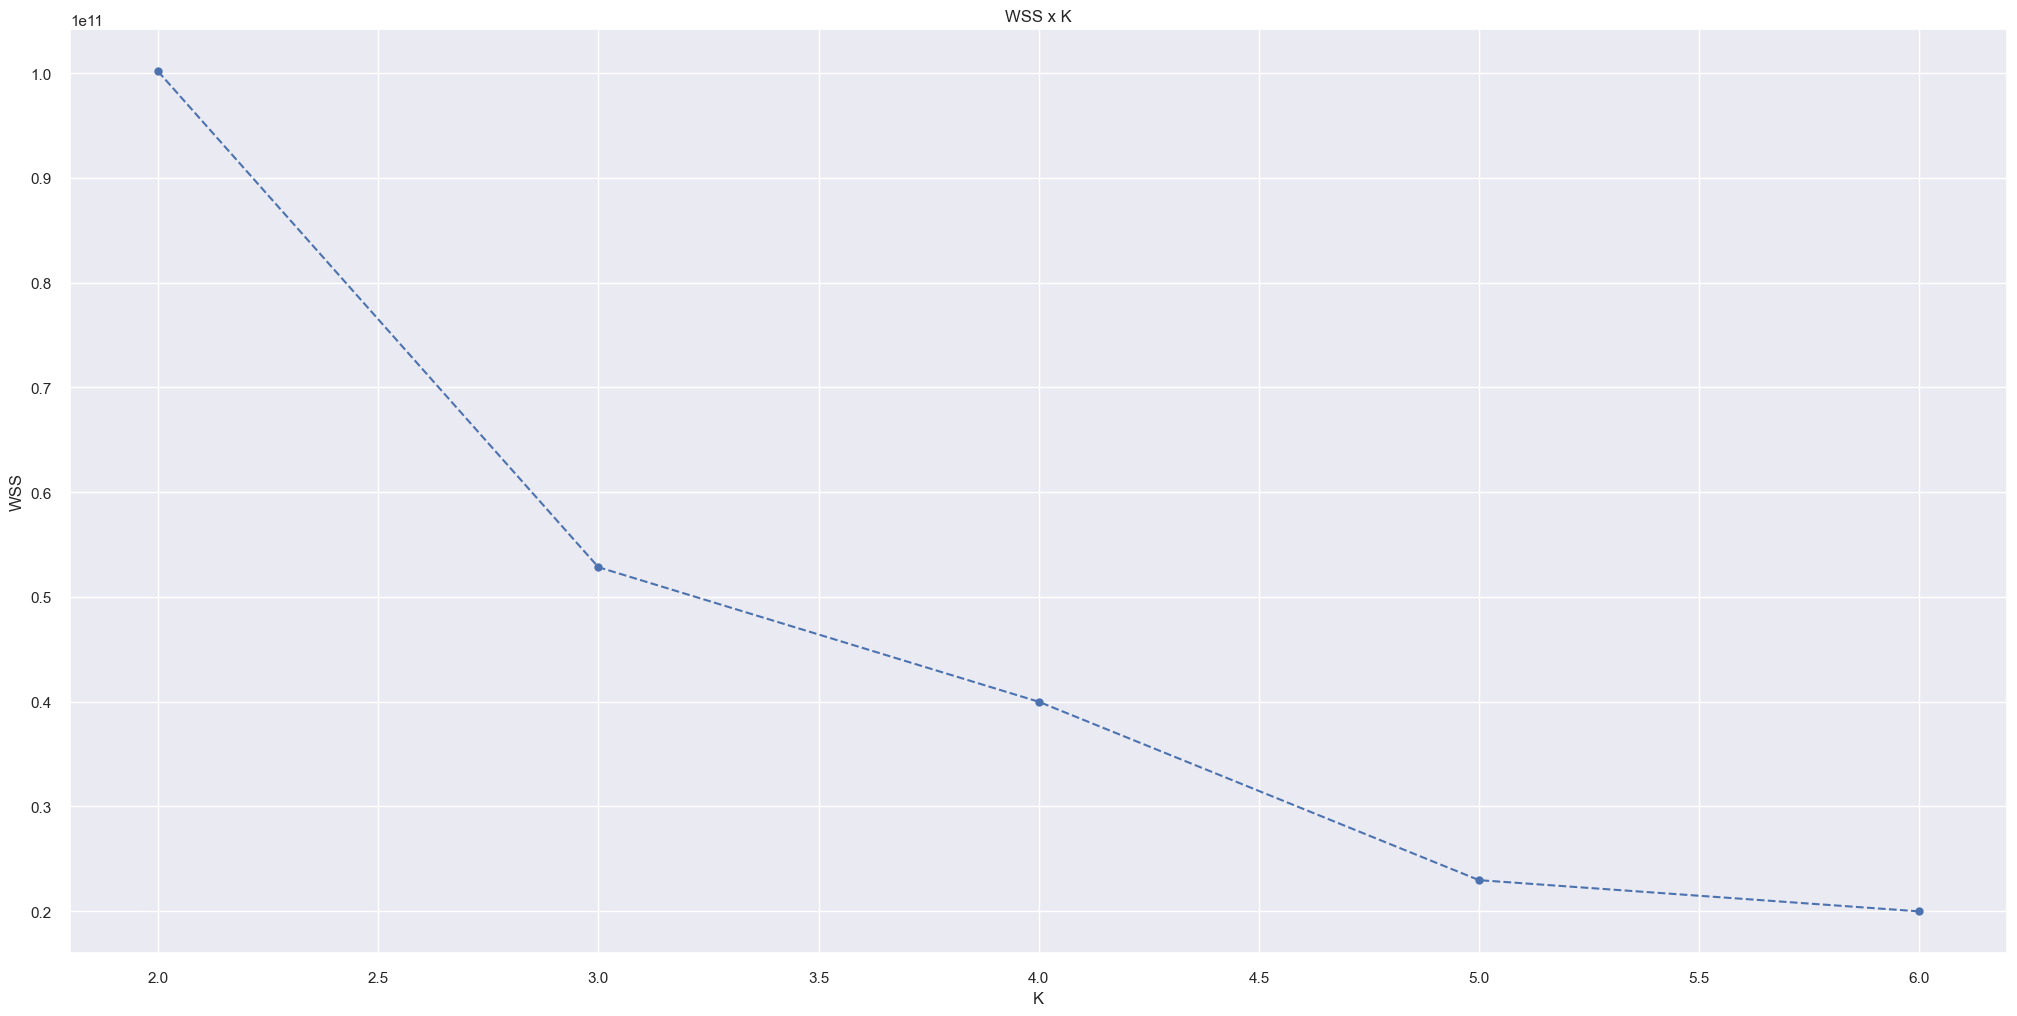

In [37]:
wss = []
for k in clusters:
  #model definition
  kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)

  #model training
  kmeans.fit(df7)
  
  #validation
  wss.append(kmeans.inertia_)

#plot wss - Ewbow Method
plt.plot(clusters,wss,linestyle='--',marker='o',color='b');
plt.xlabel('K');
plt.ylabel('WSS');
plt.title('WSS x K');

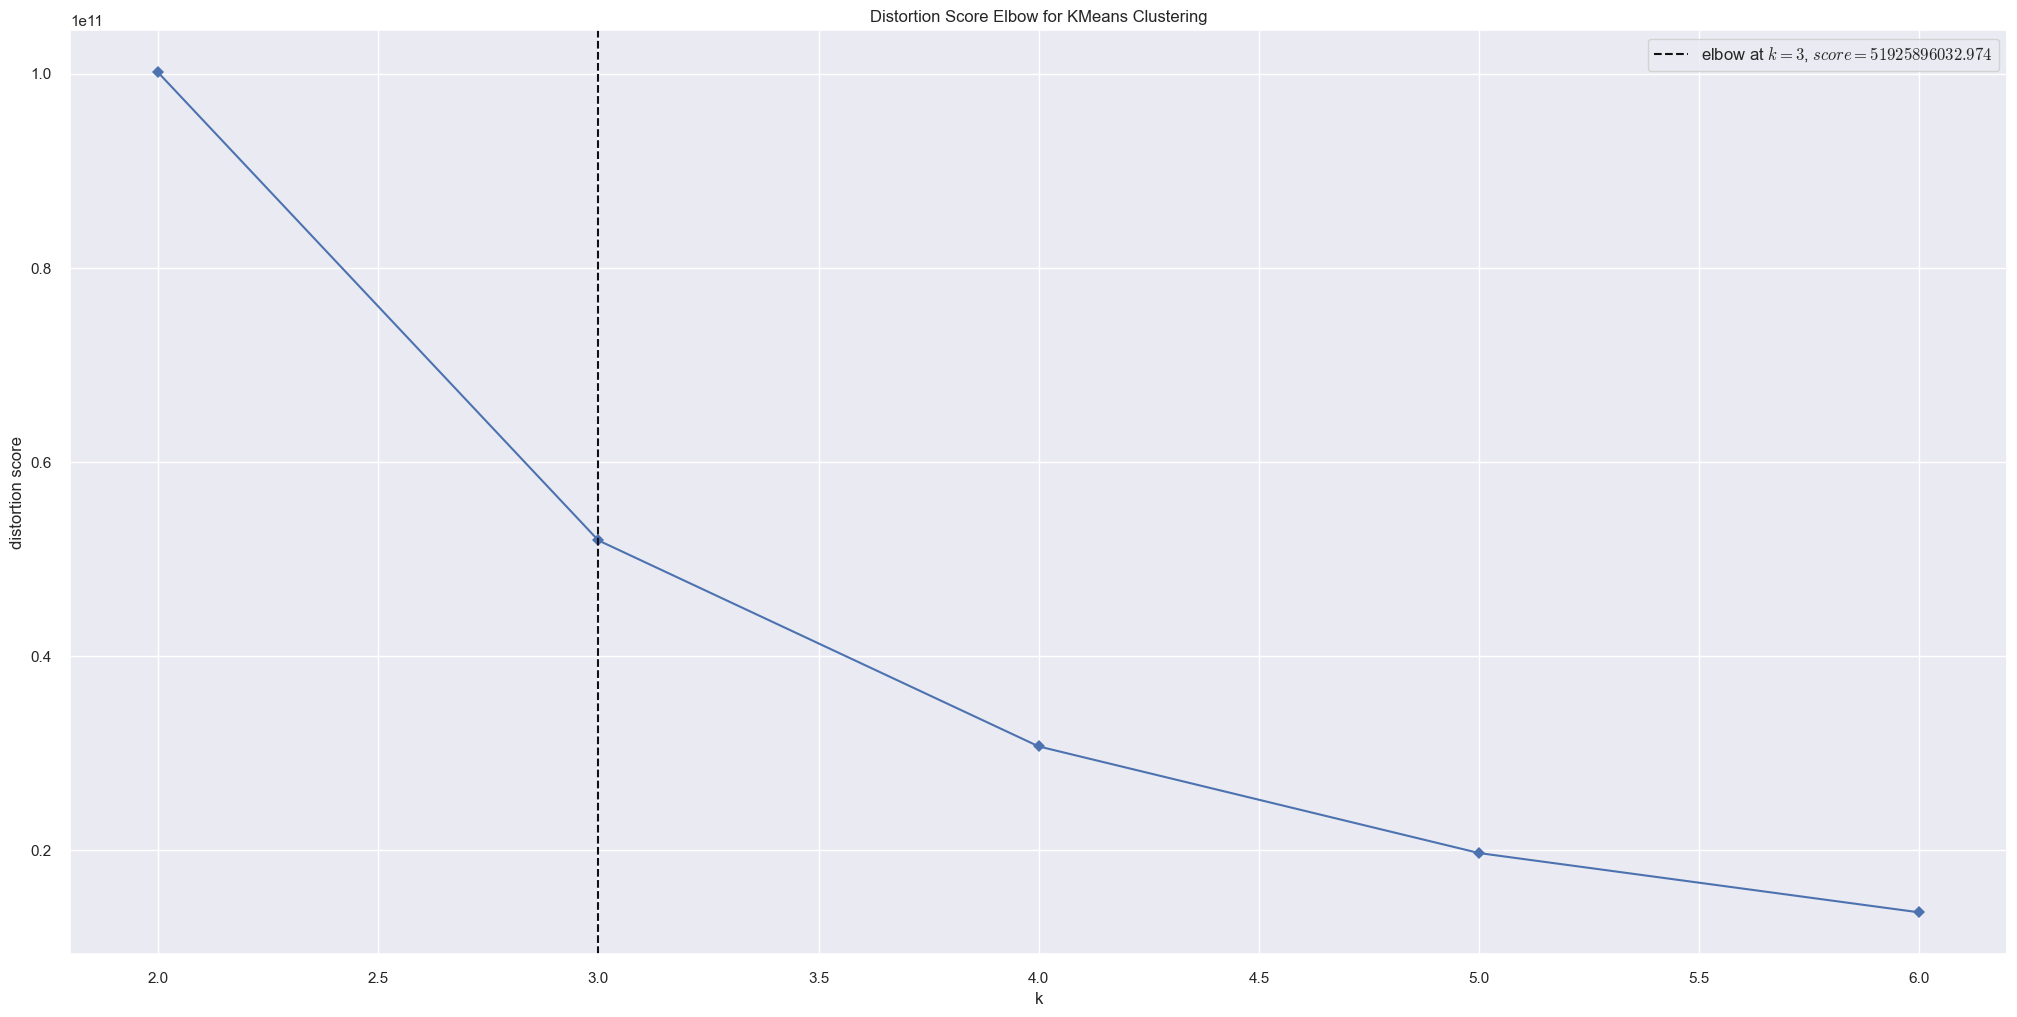

In [38]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(df7)
kmeans.show();

## 7.2 Silhouette Score

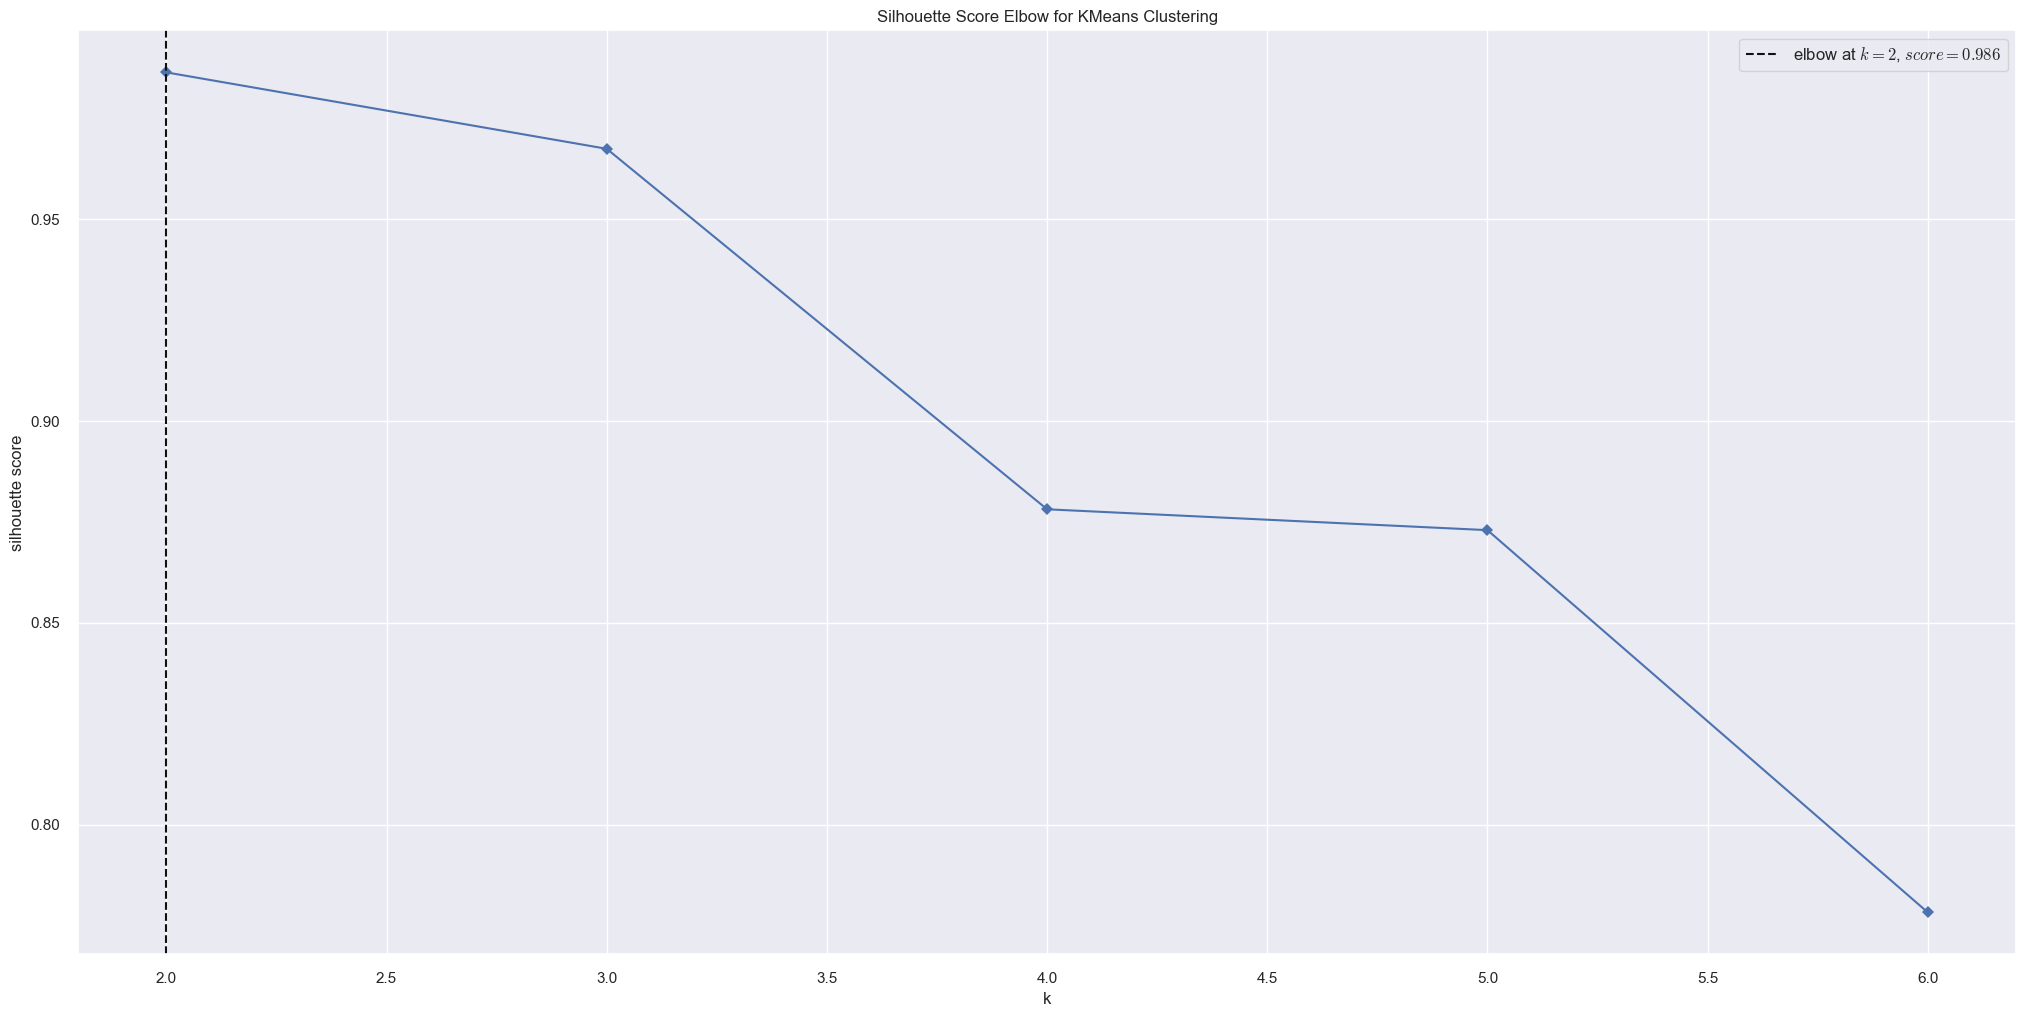

In [39]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False,metric='silhouette')
kmeans.fit(df7)
kmeans.show();

# 8.0. Model Training

In [40]:
df8 = df7.copy()

In [41]:
## 8.1 K-Means
k=3 #definido
#model definition
kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
#model training
kmeans.fit(df8)
#validation
labels = kmeans.labels_

# CONTINUAR A PARTIR DA AULA "5. Aula 028 - Ciclo 02 - Análise de Silhueta"

# 9.0. Cluster Analysis

# 10.0. Deploy To Production

## 7.1 Within-Cluster Sum of Square (WSS)

In [ ]:
wss = []
for k in clusters:
  #model definition
  kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
  #model training
  kmeans.fit(df7)
  #validation
  wss.append(kmeans.inertia_)

#plot wss - Ewbow Method
plt.plot(clusters,wss,linestyle='--',marker='o',color='b');
plt.xlabel('K');
plt.ylabel('WSS');
plt.title('WSS x K');

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(df7)
kmeans.show();

## 7.2 Silhouette Score

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False,metric='silhouette')
kmeans.fit(df7)
kmeans.show();

# <font color = "red"> 8.0 Model Training </font>

In [ ]:
df8 = df7.copy()

## 8.2 Cluster Validation

In [ ]:
# WSS (Within-Cluster Sum of Square)
print(f'WSS value: {kmeans.inertia_}')

# SS (Silhouette Score)

print('SS value: {}'.format(m.silhouette_score(df8,labels,metric='euclidean')))

# <font color = "red"> 9.0 Cluster Analysis </font>

In [ ]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

## 9.1 Visualization Inspection

In [ ]:
fig = px.scatter_3d(df9,x='recency_days',y='invoice_no',z='gross_revenue',color='cluster')
fig.show();

## 9.2 Cluster Profile

In [ ]:
#Number of customer
df_cluster = df9.loc[:,['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = round((df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100,2)

#Avg Gross revenue
df_avg_gr = df9.loc[:,['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gr,how='inner',on='cluster')

#Avg recency days
df_avg_rd = df9.loc[:,['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_rd,how='inner',on='cluster')

#Avg invoice_no
df_avg_in = df9.loc[:,['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_in,how='inner',on='cluster')
df_cluster

### Cluster 01: (Candidato a Insider)
  - Número de customers: 6 (0,14% da base)
  - Recência média: 7 dias
  - Frequência média: 89 compras
  - Receita média: $ 182.182

### Cluster 02:
  - Número de customers: 31 (0,71% da base)
  - Recência média: 14 dias
  - Frequência média: 63 compras
  - Receita média: $ 40.543

### Cluster 03:
  - Número de customers: 4.335 (99,15% da base)
  - Recência média: 92 dias
  - Frequência média: 5 compras
  - Receita média: $ 1.373

# <font color = "red"> 10.0 Deploy do Production </font>